![Alt text](download.png)


In [219]:
# Get the required dependencies
! pip install bubbly -q
#! pip install iplot ##iplot installed ahead from the plotly package
! pip install chart_studio -q

In [220]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from chart_studio.plotly import plot, iplot
from plotly.offline import iplot

In [221]:
df = pd.read_csv('happiness_report.csv')

In [222]:
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [223]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [224]:
df[df['Country or region'] == "Iran"]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
116,117,Iran,4.548,1.1,0.842,0.785,0.305,0.27,0.125


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [226]:
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [227]:
df.duplicated().sum()

0

In [228]:
maxi = df['Score'].max()  
df[df['Score'] == maxi]   


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393


<Figure size 2000x2000 with 0 Axes>

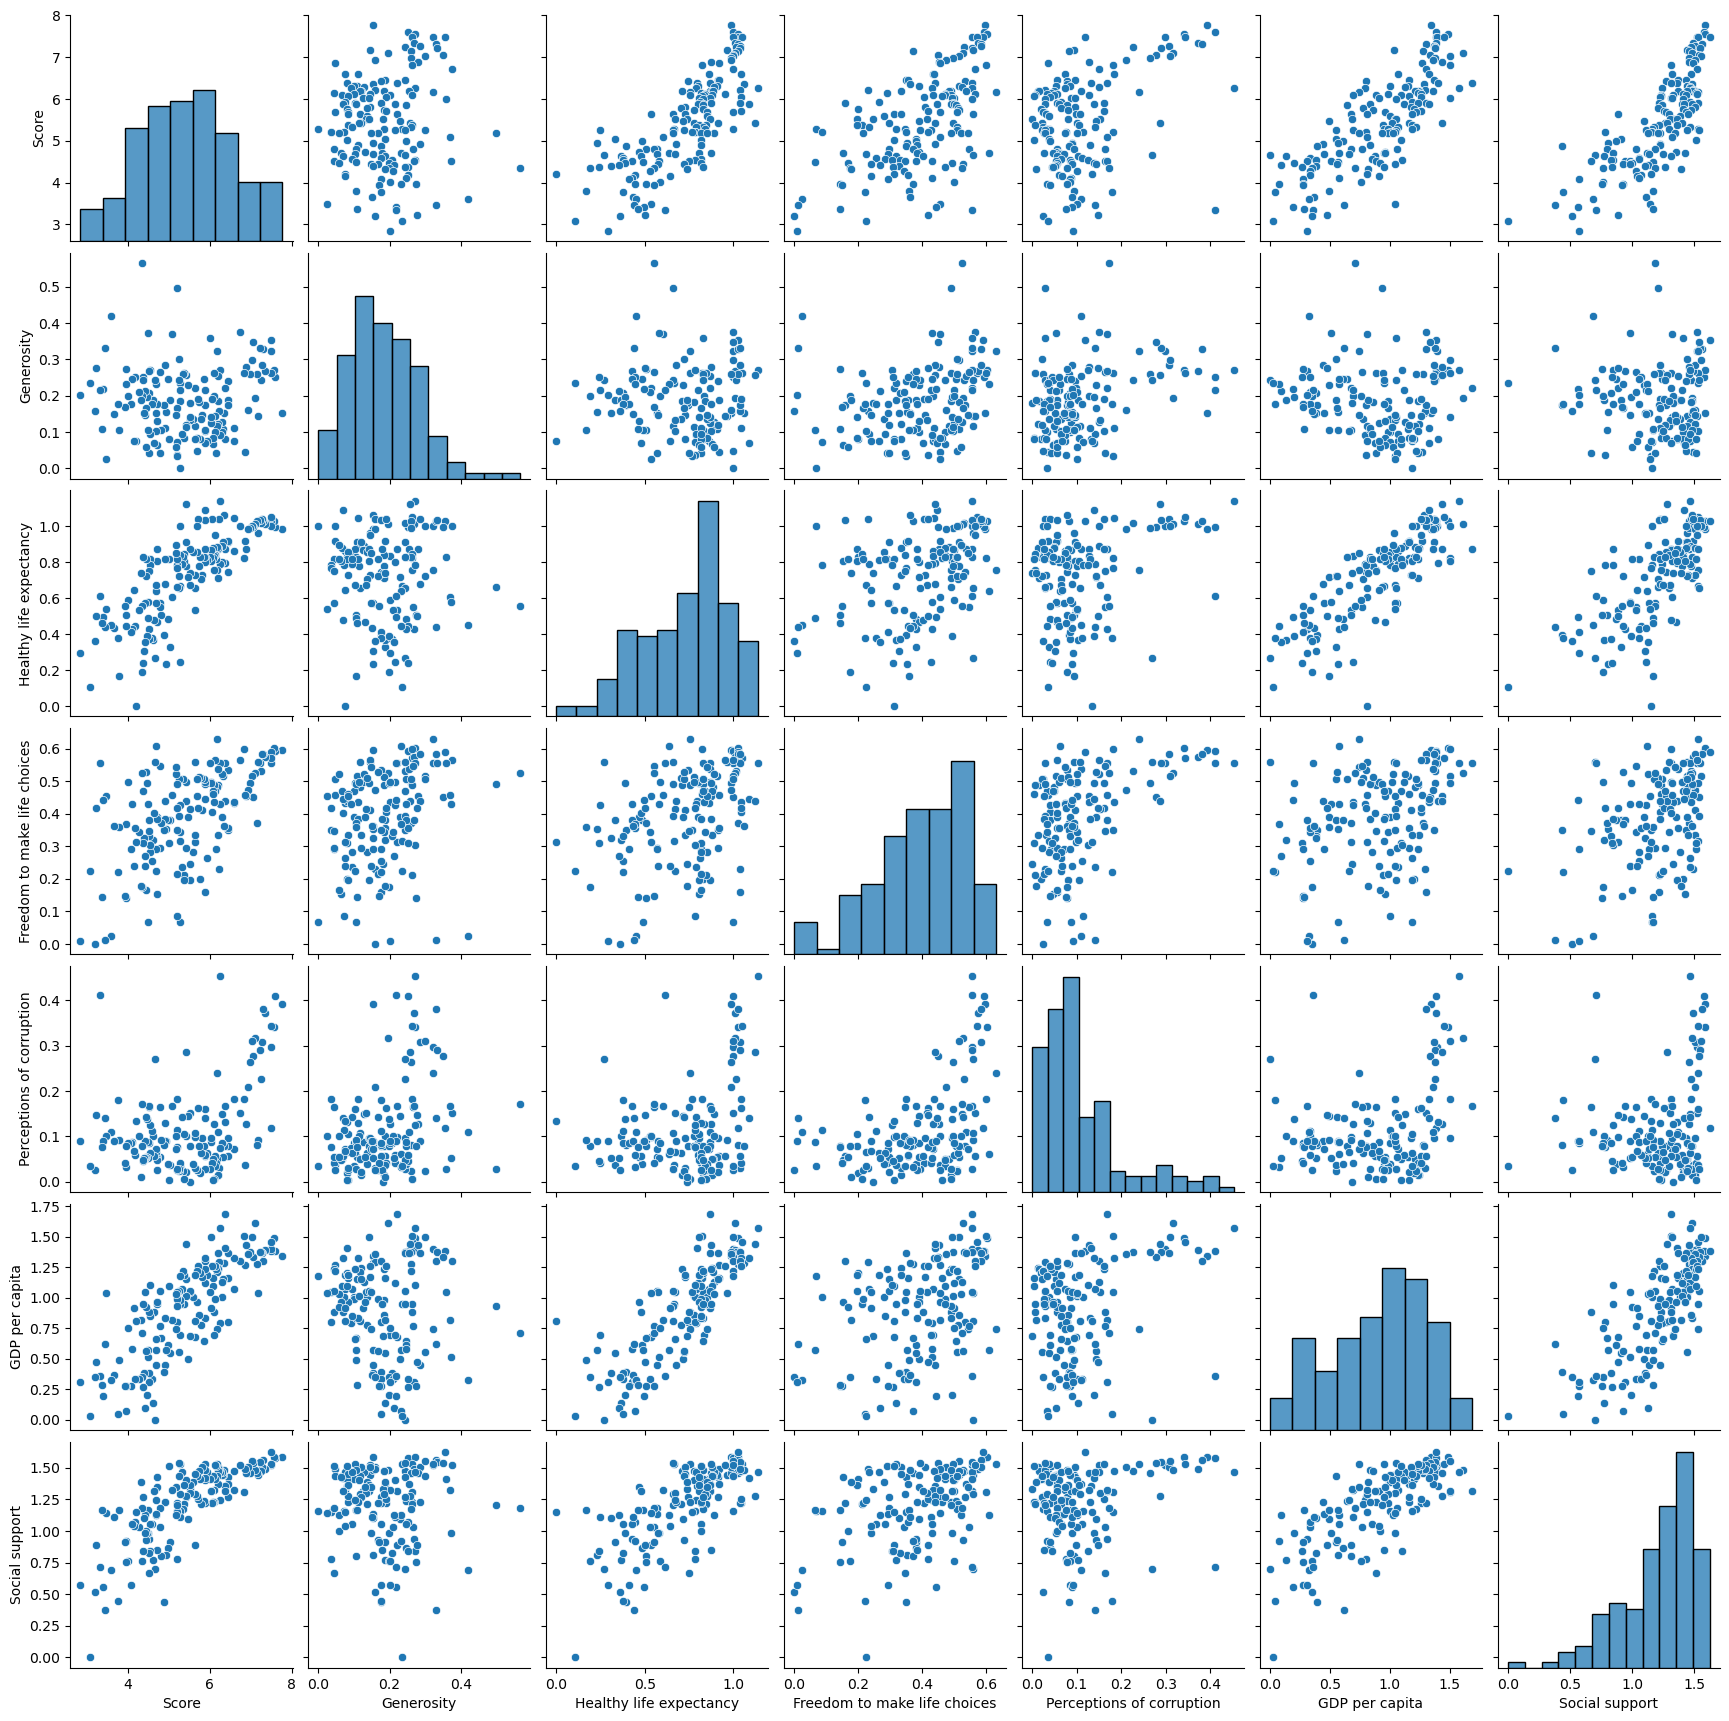

In [229]:
fig  = plt.figure(figsize=(20,20))
sns.pairplot(df[['Score','Generosity','Healthy life expectancy', "Freedom to make life choices",'Perceptions of corruption','GDP per capita','Social support']])
plt.show();

The scatterplot matrix in the image shows pairwise relationships between several features and the overall "Score" (likely a happiness or well-being index). Here's an analysis of the relationships between the features and the "Score":

### Key Observations:
1. **Social Support vs. Score**:
   - There is a strong positive correlation between "Social Support" and "Score." Countries with higher social support tend to have higher scores, as seen from the upward trend in their scatterplot.

2. **GDP per Capita vs. Score**:
   - A clear positive relationship exists between "GDP per Capita" and "Score." Higher economic output per capita is associated with higher scores, indicating that wealthier nations generally report higher well-being.

3. **Healthy Life Expectancy vs. Score**:
   - This feature also shows a positive correlation with "Score." Countries with longer healthy life expectancies tend to have higher scores, reflecting the importance of health in overall well-being.

4. **Freedom to Make Life Choices vs. Score**:
   - There is a moderate positive relationship here. Countries where people feel freer to make life choices tend to have higher scores.

5. **Generosity vs. Score**:
   - The relationship between "Generosity" and "Score" appears weaker compared to other features, though there is still a slight positive trend.

6. **Perceptions of Corruption vs. Score**:
   - This feature shows a negative relationship with the score. Countries with lower perceptions of corruption (higher trust in institutions) tend to have higher scores.

### General Insights:
- Features like "Social Support," "GDP per Capita," and "Healthy Life Expectancy" show the strongest correlations with the score, suggesting they are key drivers of well-being.
- Features like "Generosity" and "Perceptions of Corruption" have weaker relationships but still contribute meaningfully.
- The scatterplots' density and trends provide visual evidence for these relationships, helping identify which factors most influence the overall score.



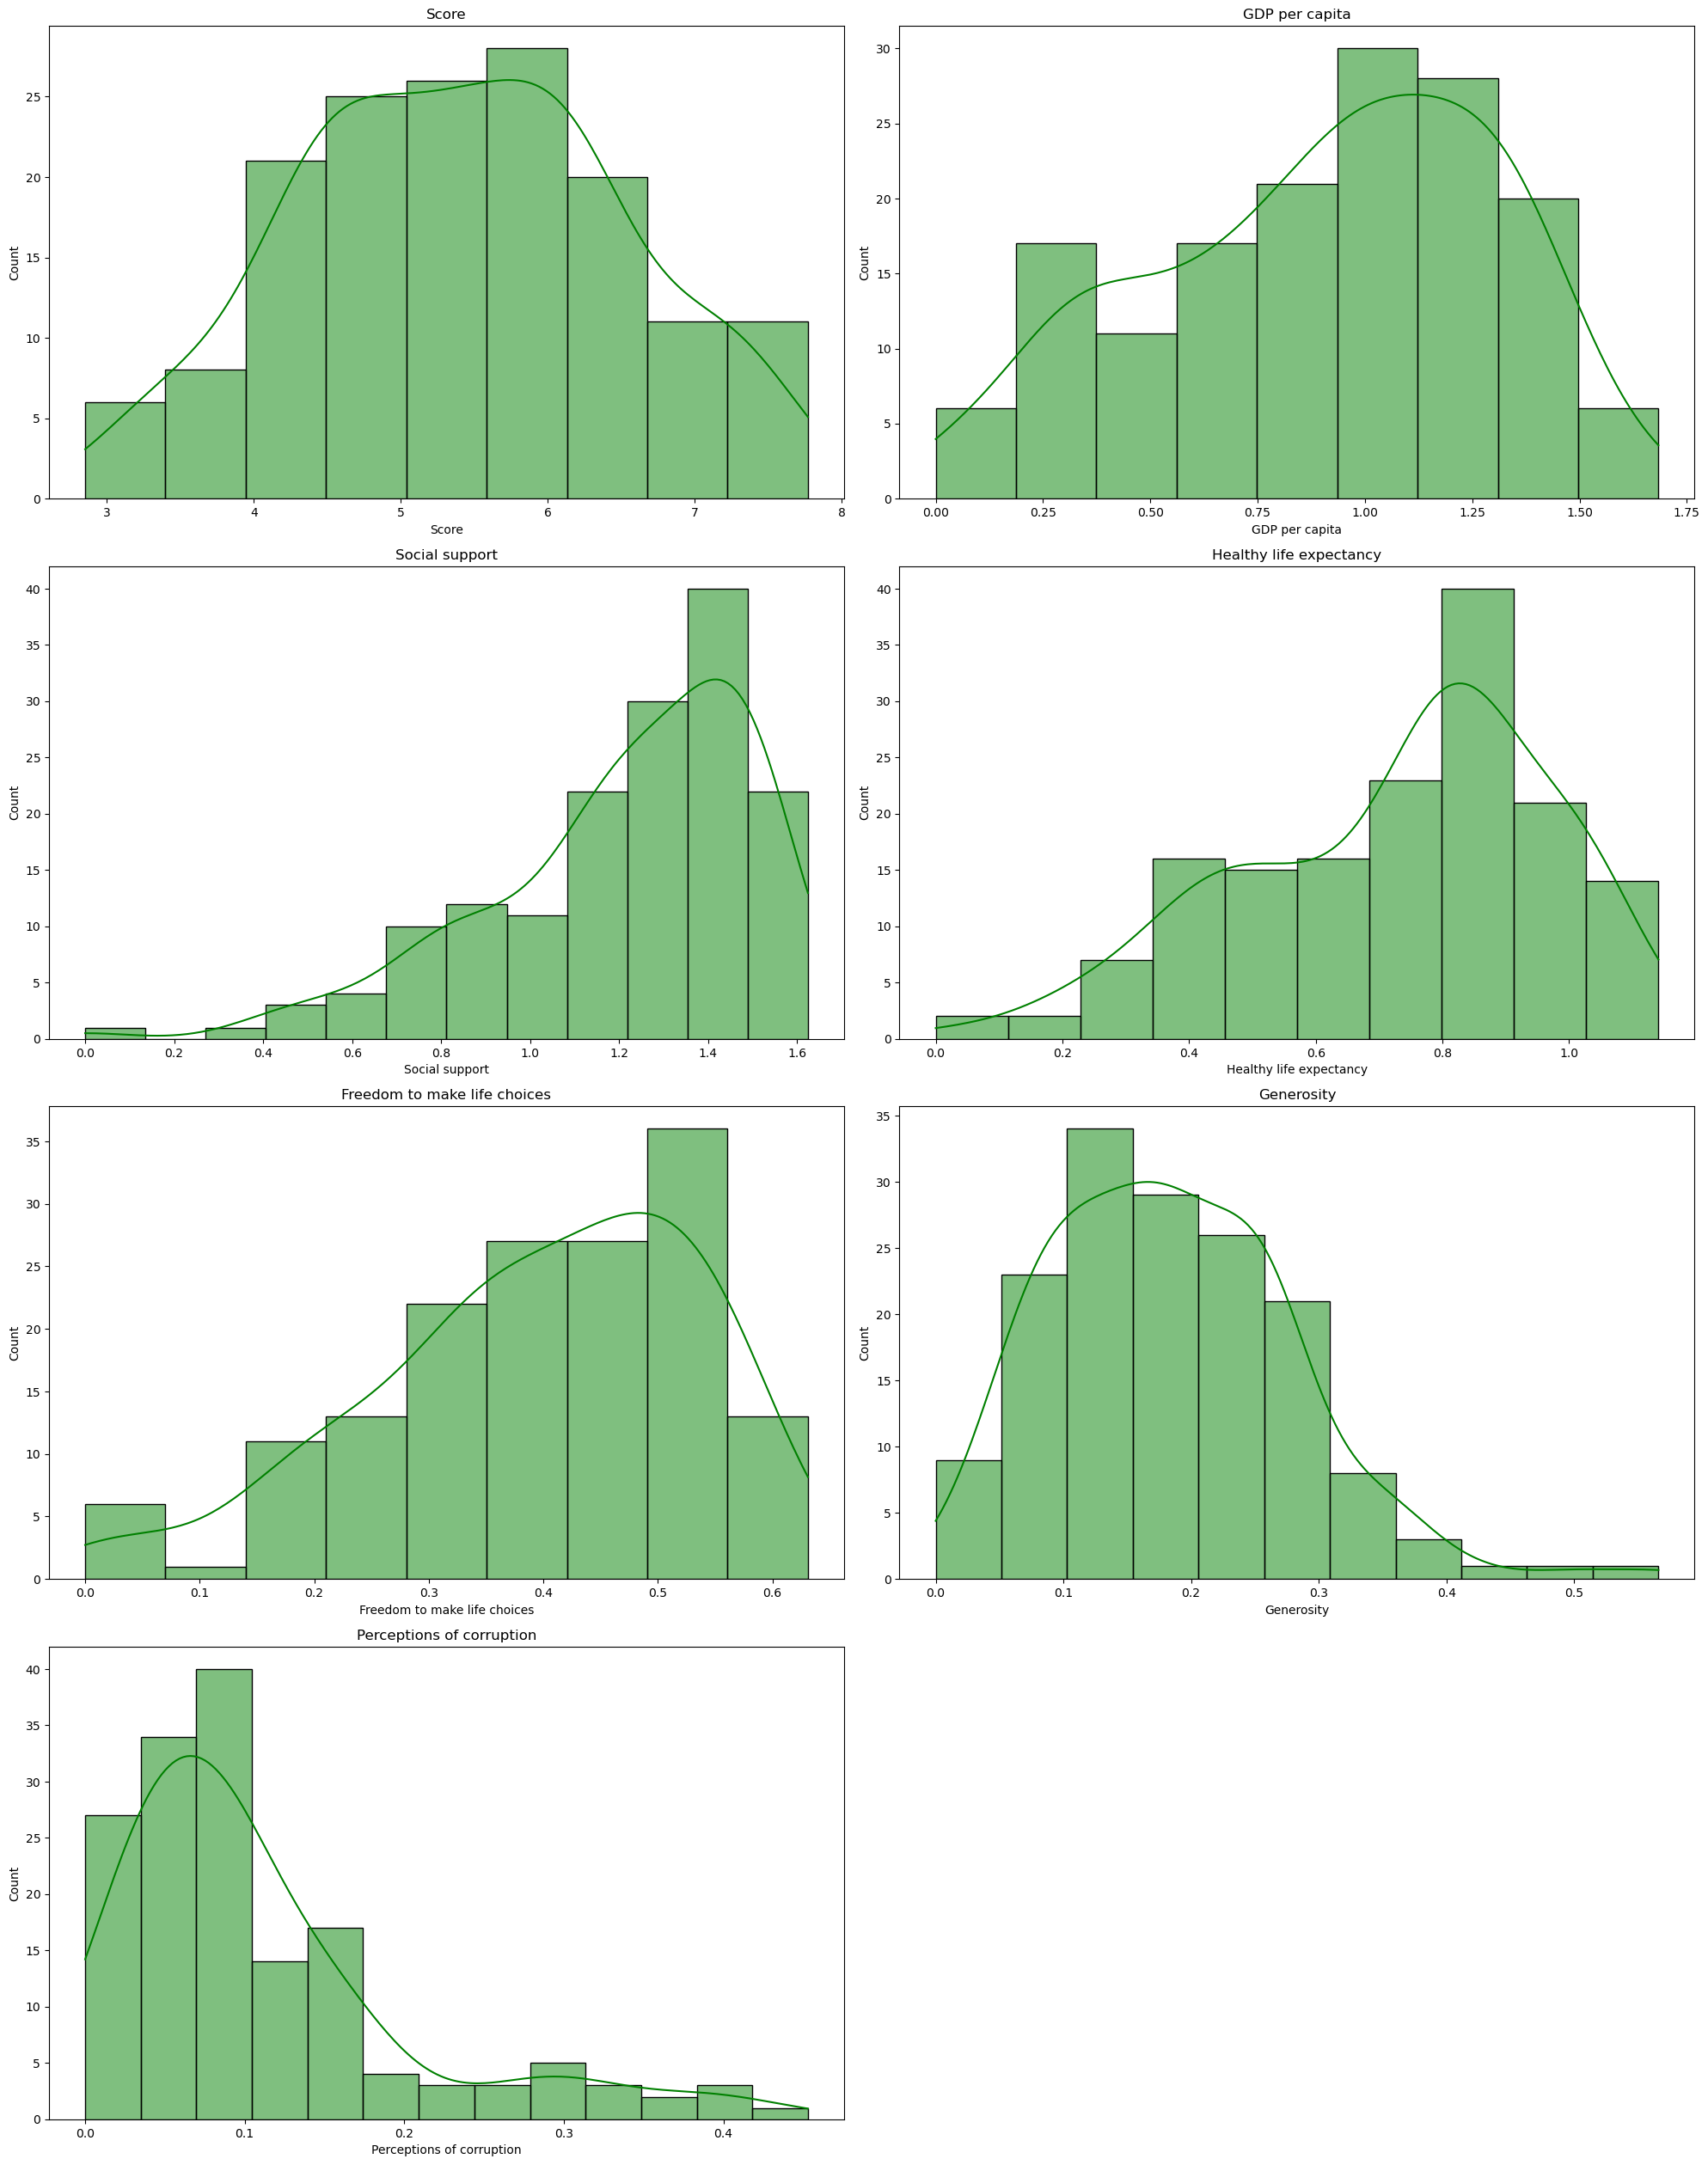

In [230]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
columns = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

plt.figure(figsize=(20, 50))
for i in range(len(columns)):
    plt.subplot(8, 2, i+1)
    sns.histplot(df[columns[i]], color='g', kde=True)
    plt.title(columns[i])

plt.tight_layout()


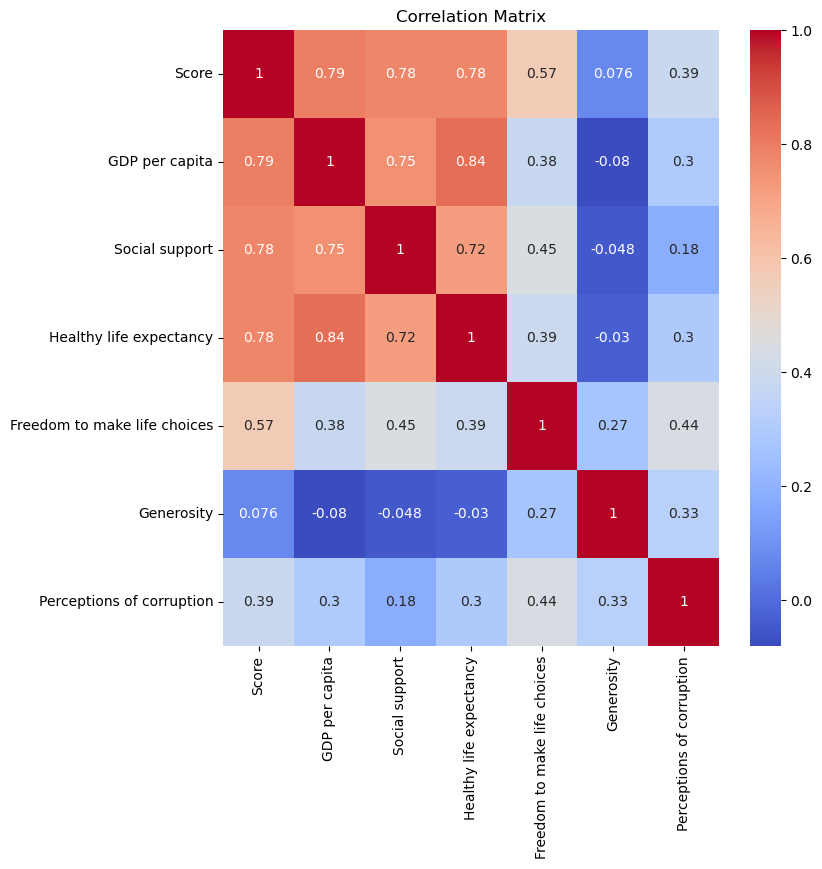

In [231]:
columns = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

plt.figure(figsize=(8, 8))
corr = df[columns].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')

plt.show();

In [232]:
# Find the appropriate sizeref to normalize the size
max_size = df['Overall rank'].max()
fig = px.scatter(df, x='GDP per capita', y='Score', text="Country or region", 
                 size=max_size - df['Overall rank'] + 1,  # Reverse size mapping
                 color='Country or region')

fig.update_layout(title='GDP per Capita vs. Score')
fig.show()


In [233]:

fig = px.scatter(df, x="Freedom to make life choices", y='Score',size=max_size - df['Overall rank'] + 1, color='Country or region', trendline='ols')

fig.update_layout(title='Freedom to Make Life Choices vs. Score')

fig.show();

In [234]:
import plotly.express as px

fig = px.scatter(df, x="Healthy life expectancy", y='Score', size=max_size - df['Overall rank'] + 1, hover_name='Country or region')
fig.update_layout(height=1000, width=1000)

fig.update_layout(
    title={
        'text': 'Healthy Life Expectancy vs. Score',  # Title text
        'x': 0.5,  # Centers the title (0: left, 0.5: center, 1: right)
        'xanchor': 'center',  # Ensures proper centering
        'yanchor': 'top'
    },
    title_font=dict(size=24)  # Adjust title font size
)

fig.update_traces(textposition='top center')

fig.show()


In [235]:
df_no_target = df.drop(columns=['Score', 'Overall rank', 'Country or region'])
df_no_target

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.340,1.587,0.986,0.596,0.153,0.393
1,1.383,1.573,0.996,0.592,0.252,0.410
2,1.488,1.582,1.028,0.603,0.271,0.341
3,1.380,1.624,1.026,0.591,0.354,0.118
4,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...
151,0.359,0.711,0.614,0.555,0.217,0.411
152,0.476,0.885,0.499,0.417,0.276,0.147
153,0.350,0.517,0.361,0.000,0.158,0.025
154,0.026,0.000,0.105,0.225,0.235,0.035


In [236]:
scaler = StandardScaler()

# Fit and transform the data

df_scaled = scaler.fit_transform(df_no_target)

df_scaled = pd.DataFrame(df_scaled, columns=df_no_target.columns)

df_scaled

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.095042,1.268098,1.080422,1.424282,-0.335404,2.996757
1,1.203324,1.221154,1.121857,1.396277,0.707265,3.177158
2,1.467734,1.251332,1.254446,1.473292,0.907373,2.444941
3,1.195769,1.392163,1.246159,1.389276,1.781530,0.078500
4,1.236060,1.050146,1.134287,1.151229,1.444506,1.988632
...,...,...,...,...,...,...
151,-1.375303,-1.669224,-0.460929,1.137227,0.338645,3.187770
152,-1.080675,-1.085783,-0.937421,0.171040,0.960033,0.386244
153,-1.397967,-2.319726,-1.509213,-2.748526,-0.282744,-0.908401
154,-2.213861,-4.053282,-2.569928,-1.173221,0.528221,-0.802283


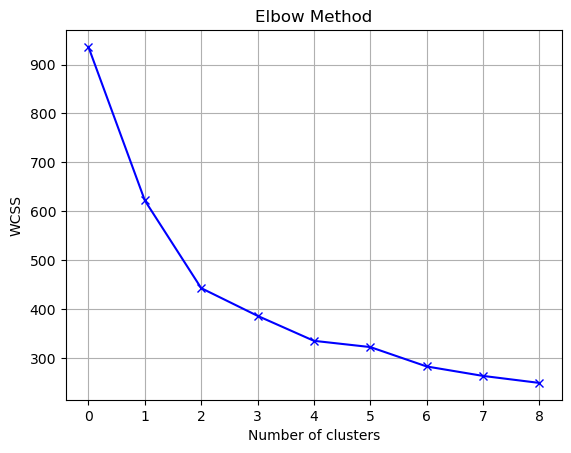

In [237]:
scores = []


for i in range(1, 10):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(df_scaled)
    scores.append(kmeans.inertia_)

plt.plot(scores, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show();

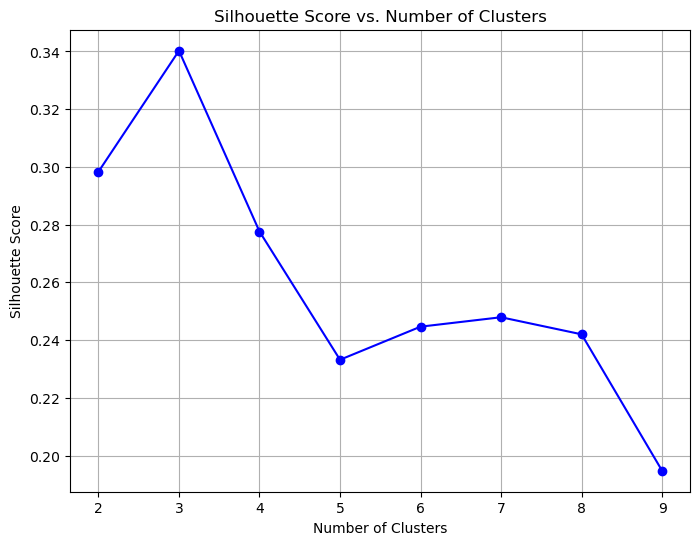

In [238]:
from sklearn.metrics import silhouette_score, silhouette_samples

# Define the range for the number of clusters
cluster_range = range(2, 10)  

# Lists to store silhouette scores for each number of clusters
silhouette_scores = []

# Loop over the range of clusters
for n_clusters in cluster_range:
    # Initialize the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init='auto', max_iter=300,
                   tol=0.0001, random_state=111, algorithm='lloyd')
    
    # Fit the model
    kmeans.fit(df_scaled)
    
    # Predict the cluster labels
    labels = kmeans.predict(df_scaled)
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(df_scaled, labels)
    
    # Store the silhouette score
    silhouette_scores.append(silhouette_avg)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [239]:
kmeans = KMeans(4, random_state=3)

kmeans.fit(df_scaled)

KMeans(n_clusters=4, random_state=3)

In [240]:
labels = kmeans.labels_

In [241]:
kmeans.cluster_centers_.shape

(4, 6)

In [242]:
kmeans.cluster_centers_

array([[-0.18335979,  0.11085671,  0.01332002,  0.51877356,  0.99206798,
        -0.34243599],
       [ 0.41943665,  0.35435177,  0.42804451, -0.16898284, -0.76736898,
        -0.40933674],
       [ 1.23376112,  0.95932021,  1.09897777,  1.08730398,  0.94812737,
         1.81007629],
       [-1.322925  , -1.22937995, -1.37828101, -0.64496852,  0.18329746,
        -0.12922639]])

In [243]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns= df_no_target.columns)

cluster_centers

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,-0.183360,0.110857,0.013320,0.518774,0.992068,-0.342436
1,0.419437,0.354352,0.428045,-0.168983,-0.767369,-0.409337
2,1.233761,0.959320,1.098978,1.087304,0.948127,1.810076
3,-1.322925,-1.229380,-1.378281,-0.644969,0.183297,-0.129226


In [244]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers, columns= df_no_target.columns)

cluster_centers

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,0.832333,1.241875,0.728458,0.466667,0.279042,0.078333
1,1.071710,1.314493,0.828551,0.368435,0.111986,0.072029
2,1.395087,1.494913,0.990478,0.547870,0.274870,0.281174
3,0.379800,0.842175,0.392600,0.300450,0.202250,0.098425



| Cluster | GDP per Capita | Social Support | Life Expectancy | Freedom | Generosity | Corruption |
|---------|--------------|---------------|-----------------|---------|------------|-------------|
| 0       | Medium      | High          | Medium          | Medium  | High       | Low         |
| 1       | High        | High          | High           | Low     | Low        | Low         |
| 2       | Very High   | Very High     | Very High      | High    | High       | High        |
| 3       | Low        | Medium        | Low            | Low     | Medium     | Low         |


---

## **Cluster Interpretations**  

#### **Cluster 0 (Balanced Society)**  

Countries in this cluster have a moderate GDP per capita and **a** healthy life expectancy.  
Social support is high, meaning **a** strong community or government aid.  
Freedom to make life choices is moderate.  
Generosity is relatively high, **indicating** active charitable activities.  
Perceptions of corruption are low, **shows** better governance.  

#### **Cluster 1 (Wealthy but Less Free)**  

Countries in this group have high GDP per capita and high life expectancy.  
Social support **keep** strong.  
However, freedom to make life choices **are** lower than expected.  
Generosity is very low, meaning people donate or help **more less**.  
Corruption perception is low, **what** shows relatively clean governance.  

#### **Cluster 2 (Highly Developed & Trusting)**  

This group represents very high GDP per capita and high life expectancy.  
Freedom and generosity are both high, suggesting open and **collaborated** societies.  
Perceptions of corruption are also high, which could **meaning**:  
- People are highly **noticing** corruption.  
- Corruption is actually **spreadwide**.  

#### **Cluster 3 (Developing or Struggling Countries)**  

Low GDP per capita and low life expectancy **suggests** economic and health challenges.  
Medium social support means some help **is** available, but it's not very strong.  
Freedom to make life choices **be** low, possibly indicating restrictive policies or societal pressures.  
Moderate generosity suggests community values exist but are not **so** dominant.  
Low corruption perception could mean:  
- Actual corruption is low.  
- People **don’t know much** about corruption (common in authoritarian states).  

### **Final Thoughts**  

Cluster 2 represents well-developed, open, and **cooparate** societies.  
Cluster 1 is similar but with **least** personal freedom and generosity.  
Cluster 0 balances between wealth, freedom, and social support.  
Cluster 3 faces economic and social struggles, with **more low** quality of life.  



## names for each cluster:  

| **Cluster** | **Simple Name** |  
|------------|--------------|  
| **Cluster 0** | **Balanced Nations** |  
| **Cluster 1** | **Rich but Restricted** |  
| **Cluster 2** | **Highly Developed** |  
| **Cluster 3** | **Struggling Countries** |  



In [245]:
y_kmeans = kmeans.predict(df_no_target)
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1])

In [246]:
happy_df = pd.concat([df, pd.DataFrame({'Cluster':labels})], axis= 1)
happy_df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Cluster
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,3
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,3
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,3
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,3


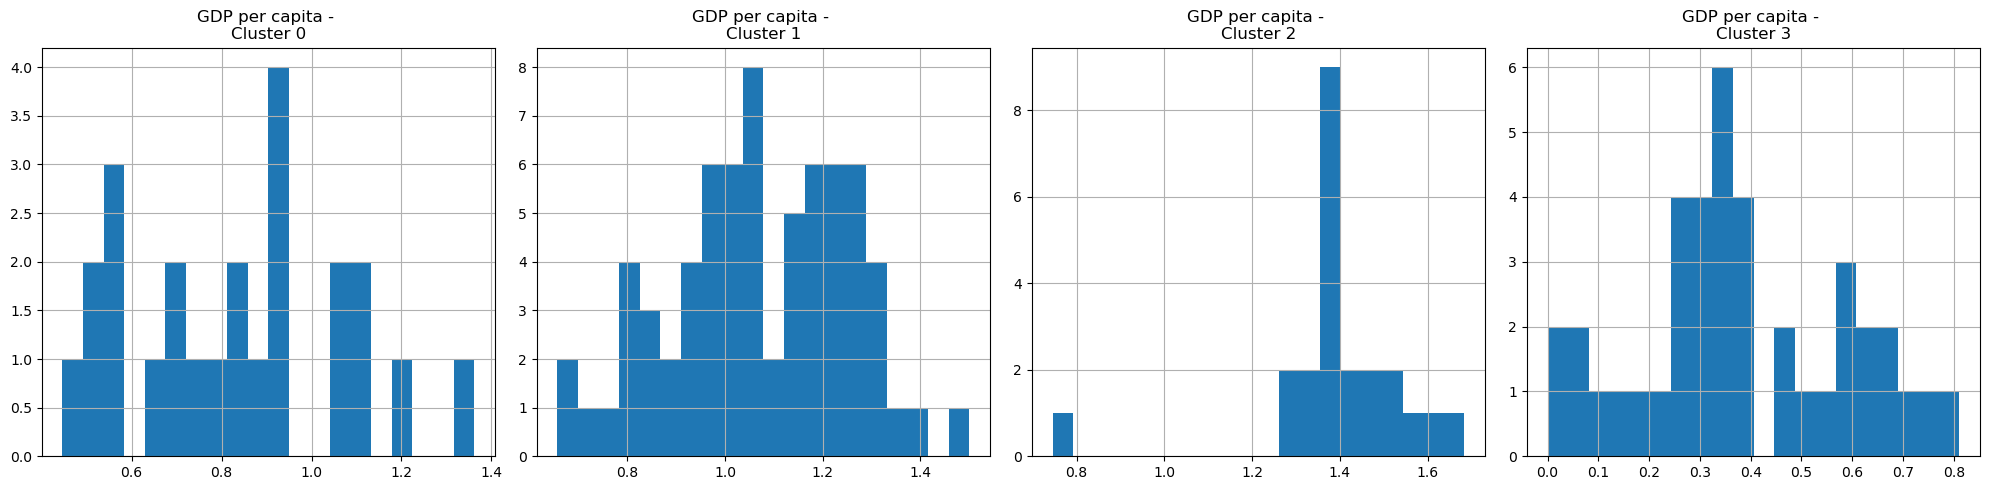

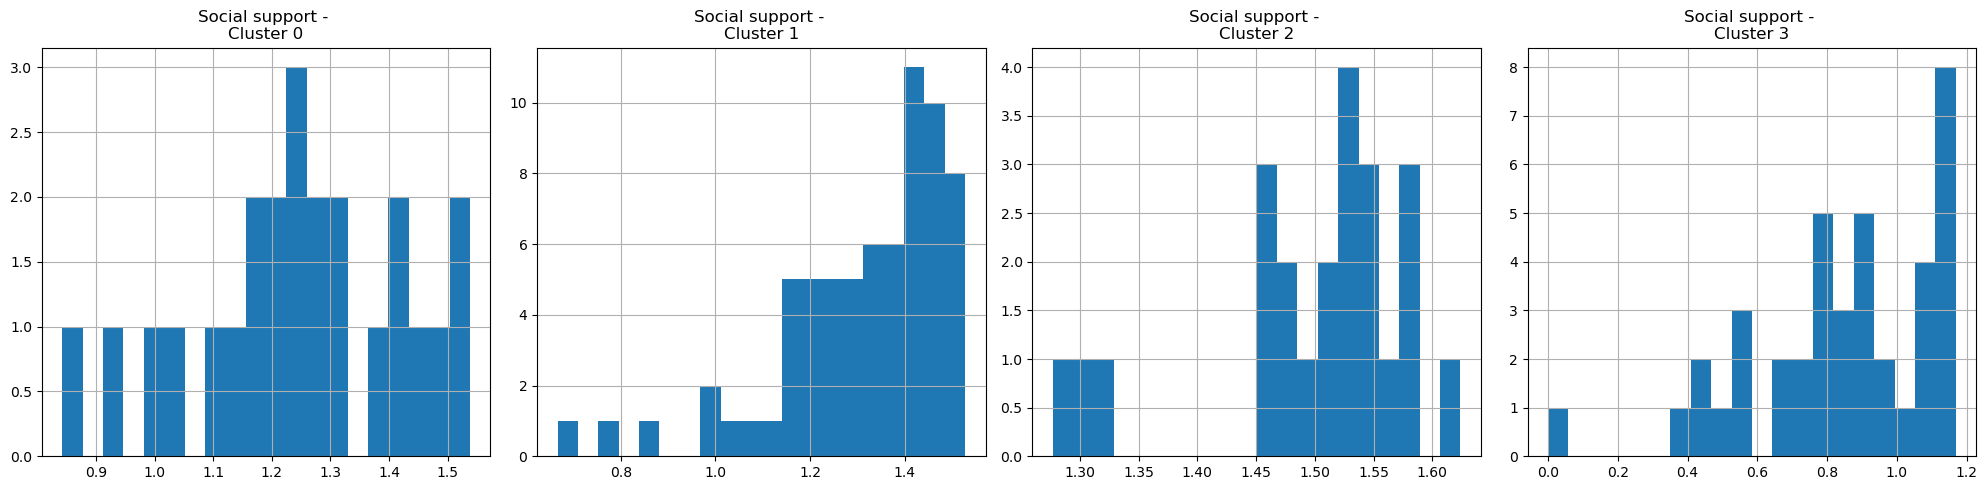

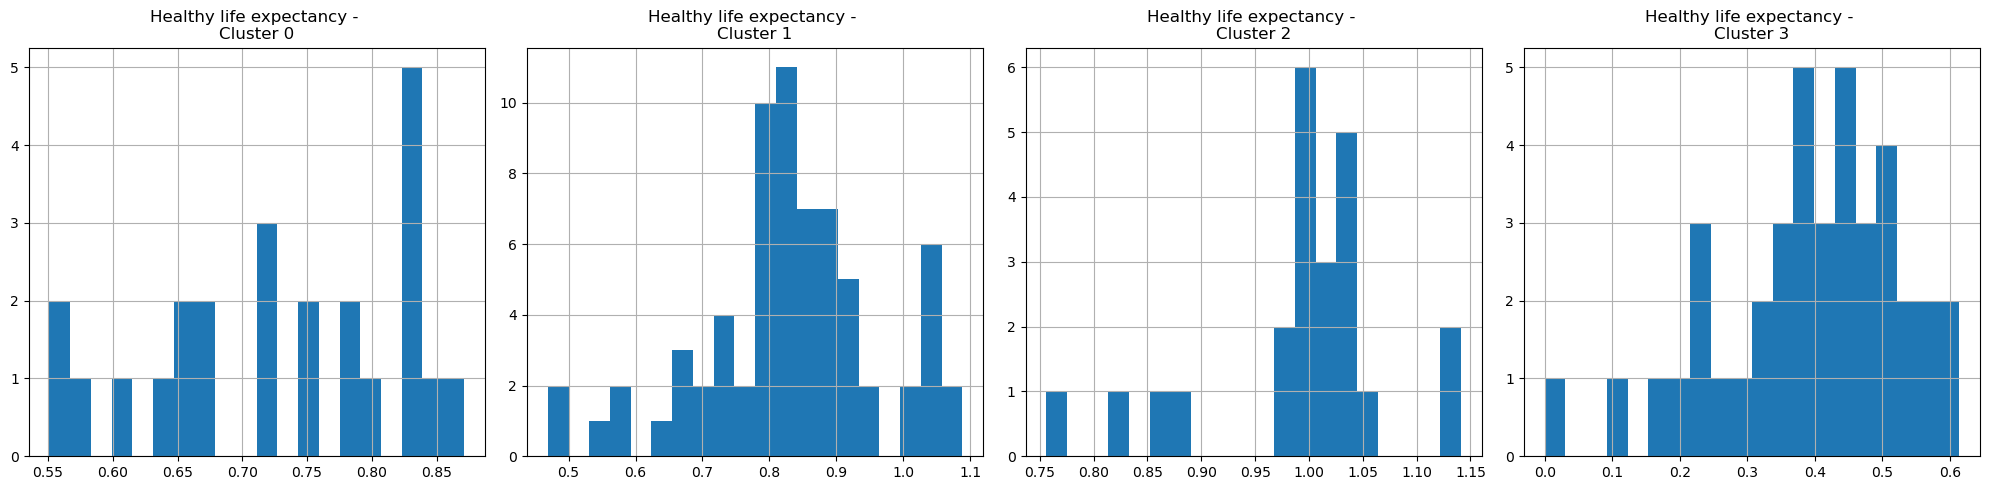

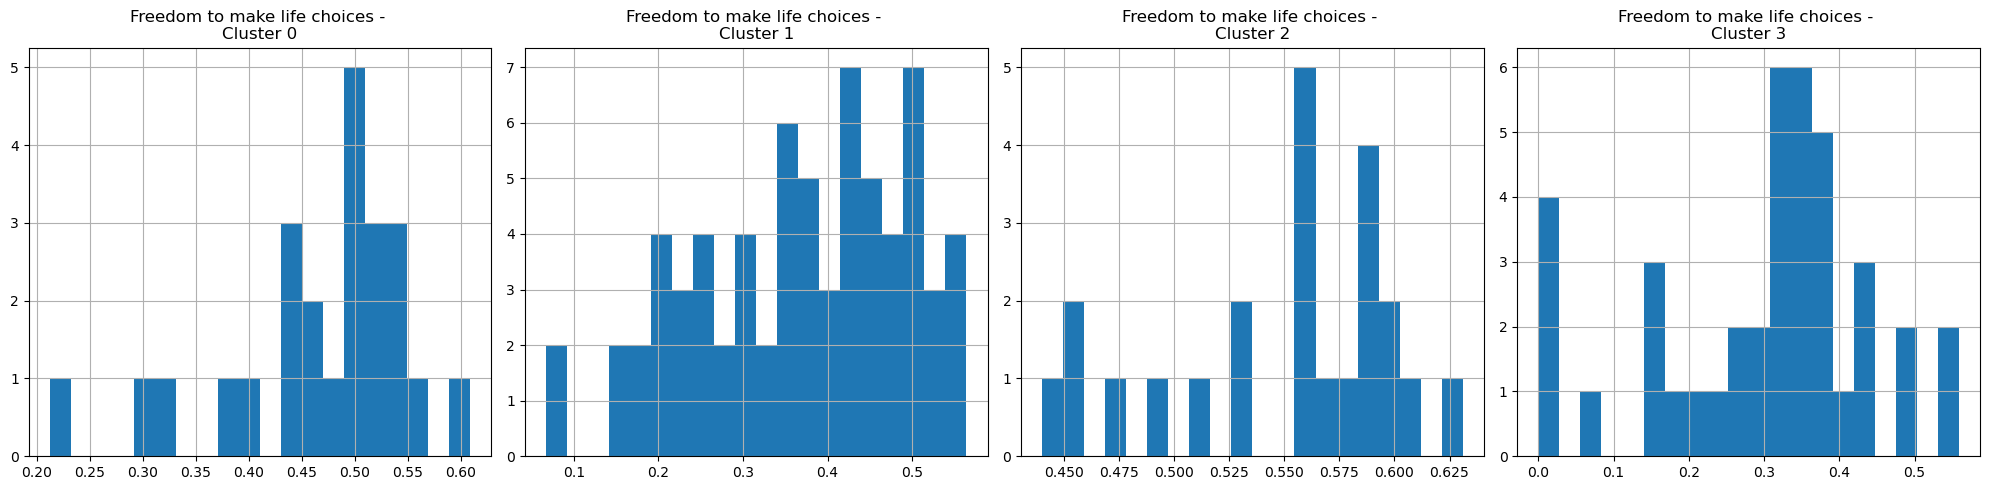

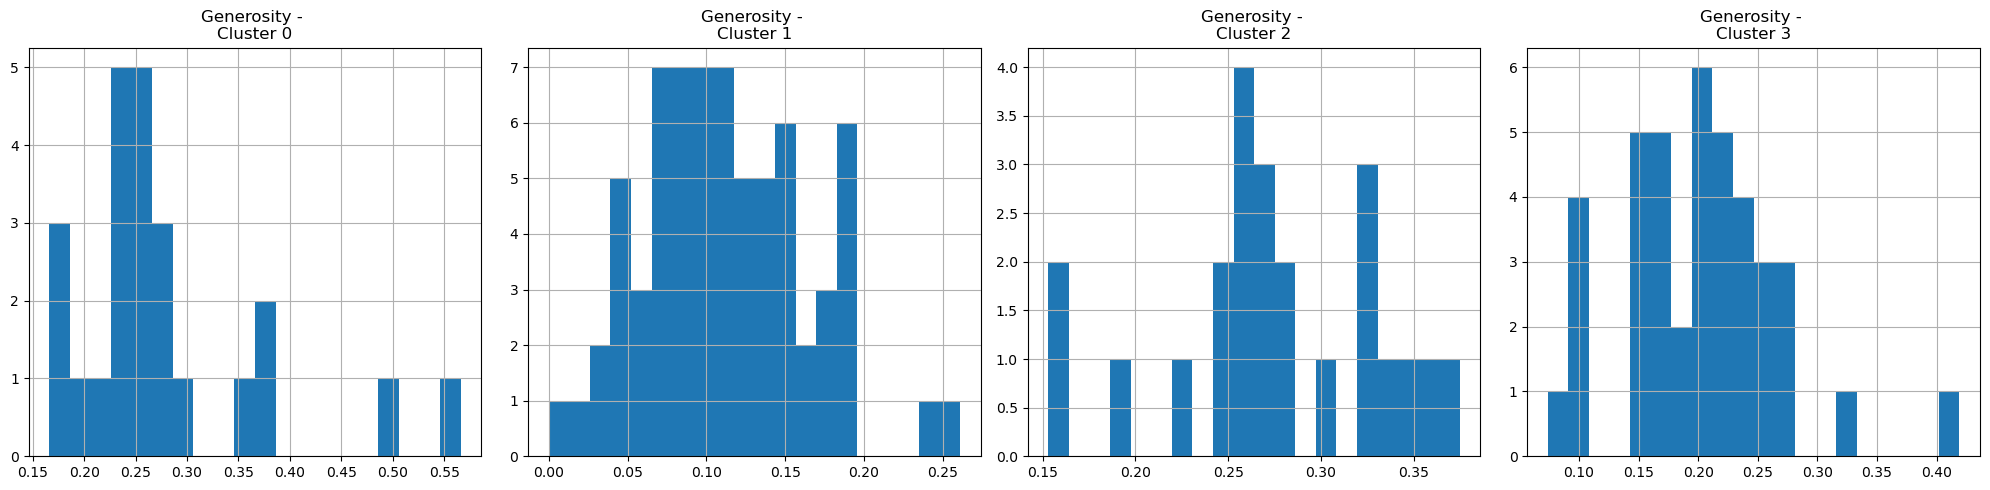

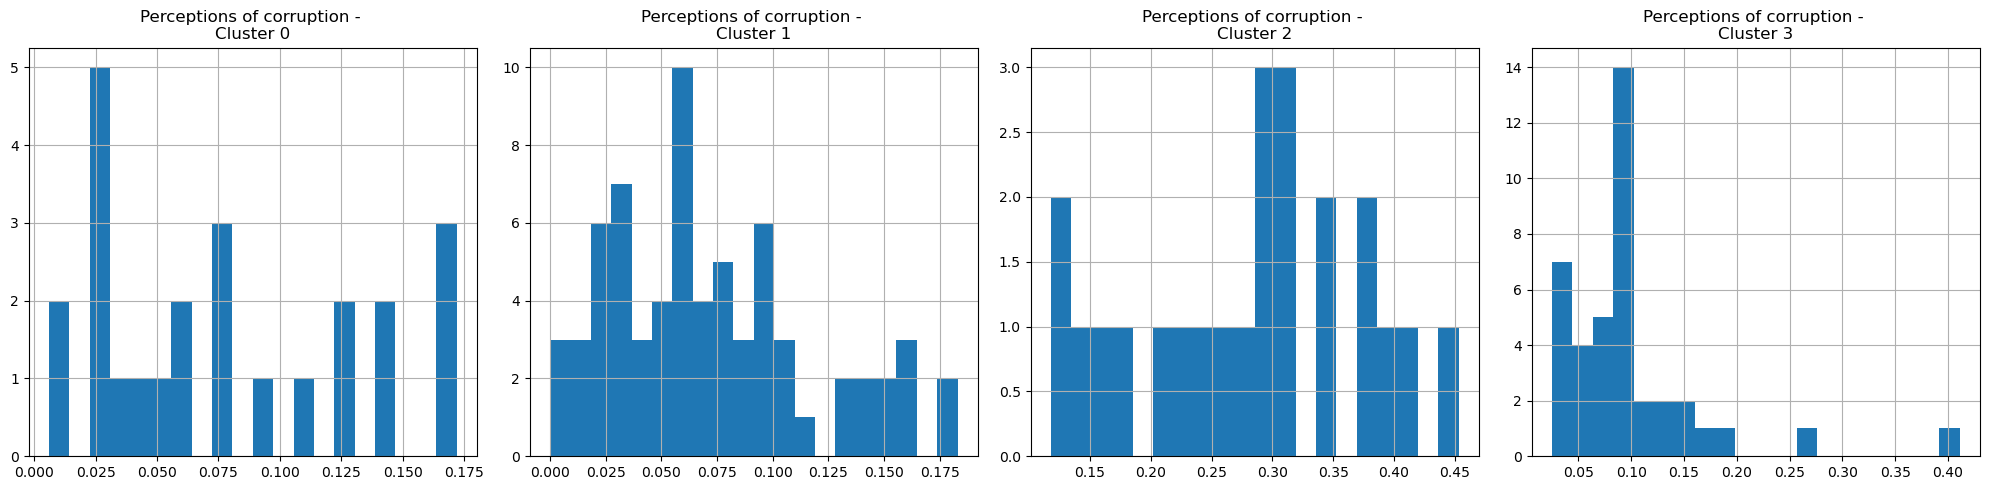

In [261]:
import matplotlib.pyplot as plt

# Loop through each column of the DataFrame (excluding target columns)
for i in df_no_target.columns:
    plt.figure(figsize=(20, 5))
    
    # Loop over the clusters (assuming you have 3 clusters: 0, 1, 2)
    for j in range(4):
        plt.subplot(1, 4, j+1)
        
        # Filter the data for the current cluster
        cluster = happy_df[happy_df['Cluster'] == j]
        
        # Plot the histogram for the column 'i' in the current cluster
        cluster[i].hist(bins=20)
        
        # Set the title of the subplot
        plt.title('{} - \nCluster {}'.format(i, j))
    
    plt.tight_layout()
    plt.show()

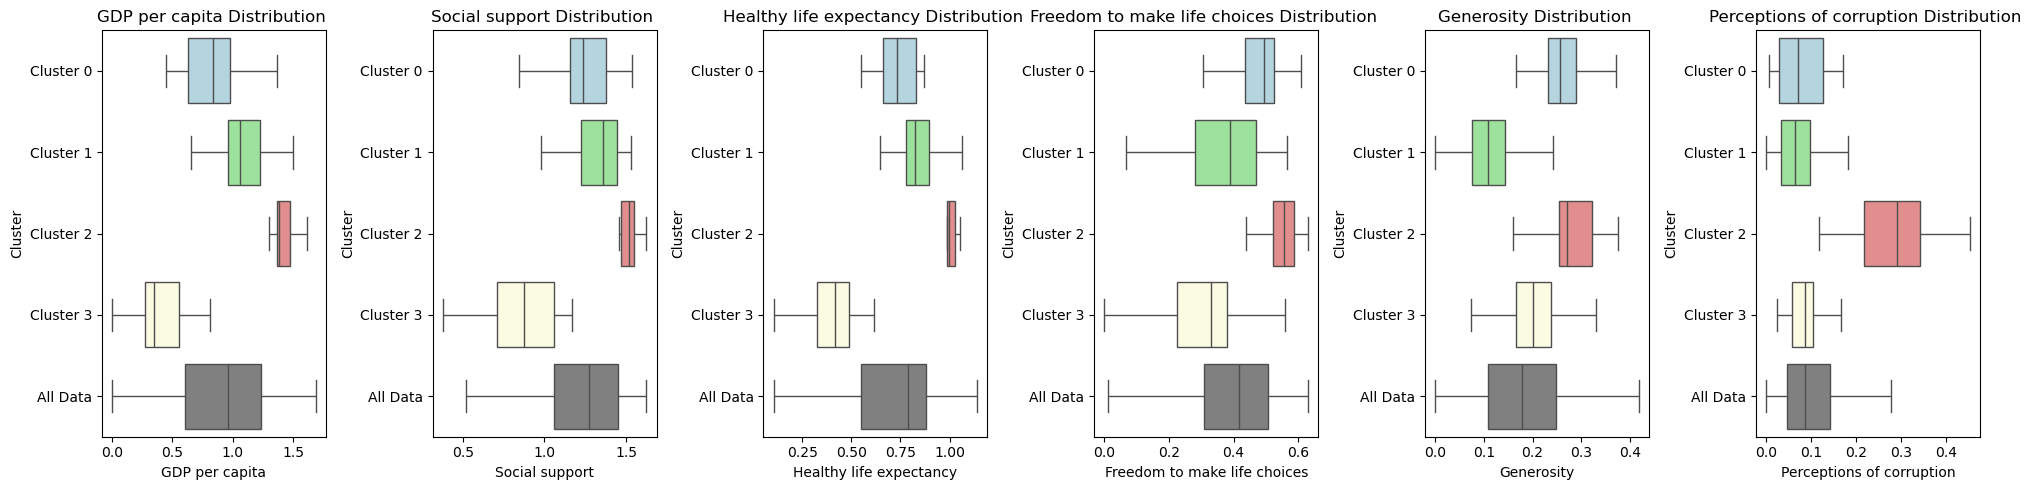

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the color for the total data (e.g., 'gray') and other clusters
cluster_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']  # Colors for clusters
total_data_color = 'gray'  # Color for the total data

# Loop through each column of the DataFrame (excluding target columns)
plt.figure(figsize=(20, 5))  # Set the figure size for all plots in one row

for i, column in enumerate(df_no_target.columns):
    plt.subplot(1, len(df_no_target.columns), i + 1)  # Set up subplots in one row
    
    # Create an empty list to hold data for box plot
    combined_data = []

    # Loop over the clusters (assuming you have 4 clusters: 0, 1, 2, 3)
    for j in range(4):
        # Filter the data for the current cluster
        cluster_data = happy_df[happy_df['Cluster'] == j][[column]]
        cluster_data['Cluster_Name'] = f'Cluster {j}'  # Add the cluster name
        
        # Append the cluster data to the combined data list
        combined_data.append(cluster_data)
    
    # Add the total dataset as a separate entry
    total_data = df_no_target[[column]].copy()
    total_data['Cluster_Name'] = 'All Data'
    combined_data.append(total_data)
    
    # Combine all data into one DataFrame
    combined_df = pd.concat(combined_data, ignore_index=True)
    
    # Create a horizontal box plot
    sns.boxplot(y='Cluster_Name', x=column, data=combined_df, showfliers=False,
                palette={**{f'Cluster {j}': cluster_colors[j] for j in range(4)}, 'All Data': total_data_color})

    # Set the title and labels
    plt.title(f'{column} Distribution ')
    plt.xlabel(column)
    plt.ylabel('Cluster')

plt.tight_layout()  # Adjust the layout for all subplots
plt.show()


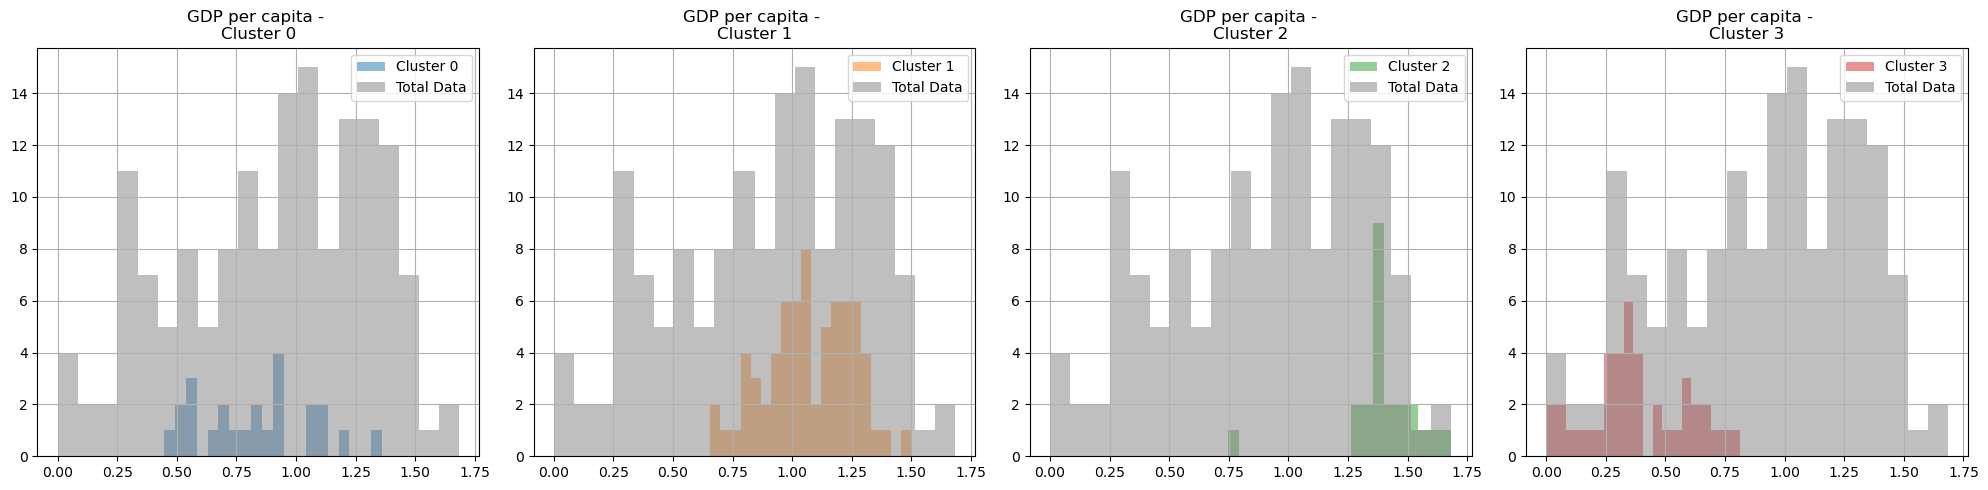

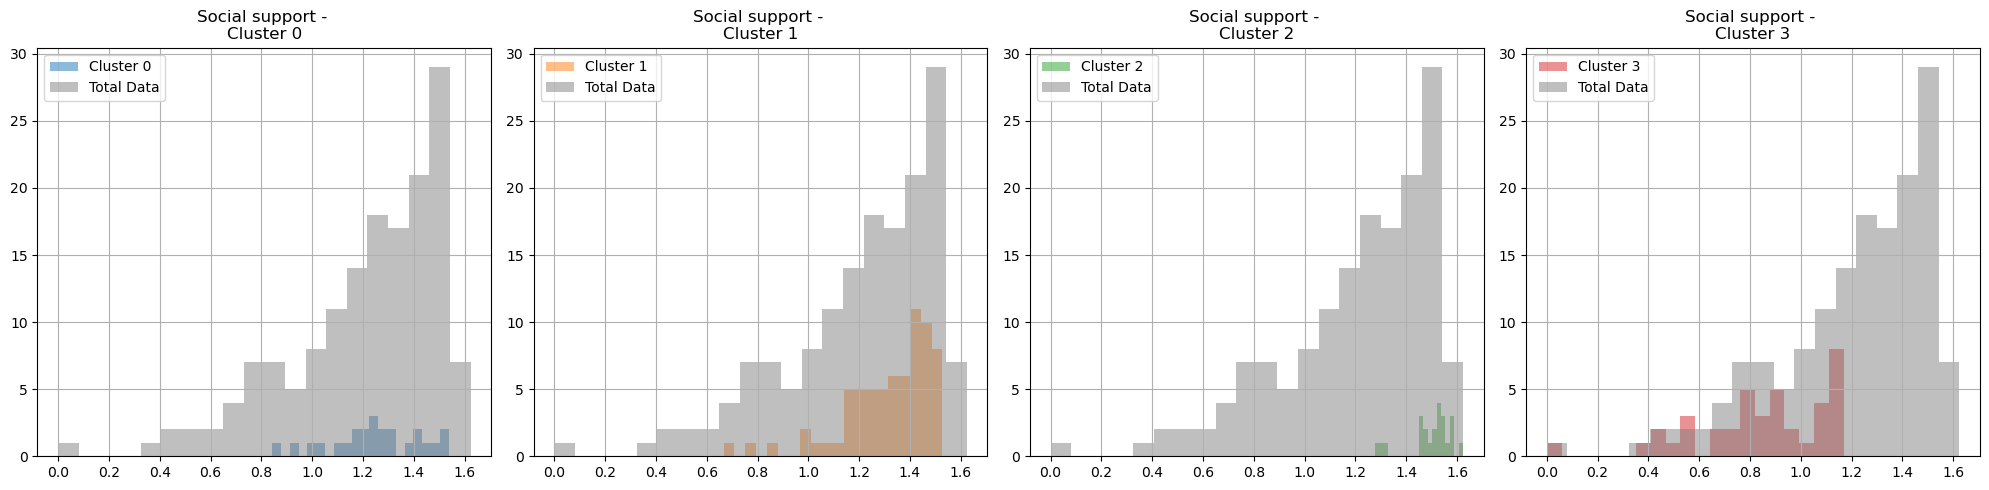

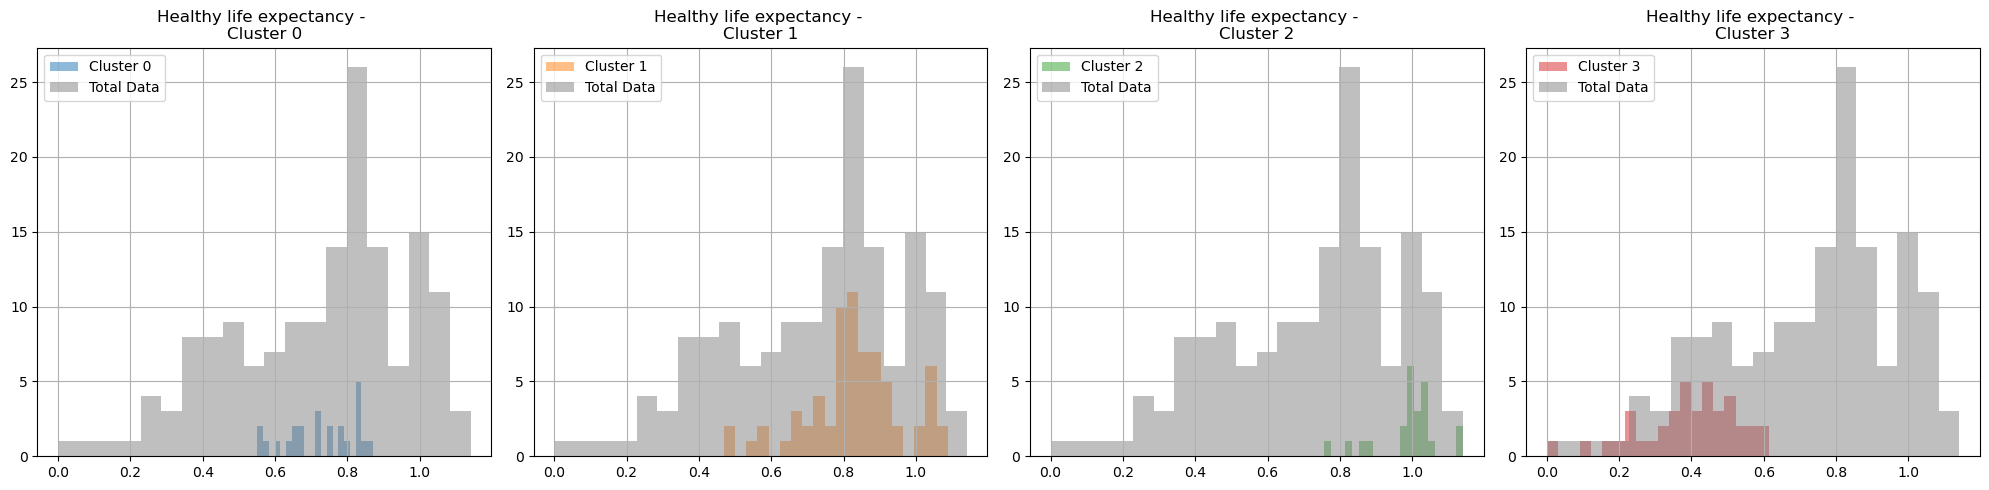

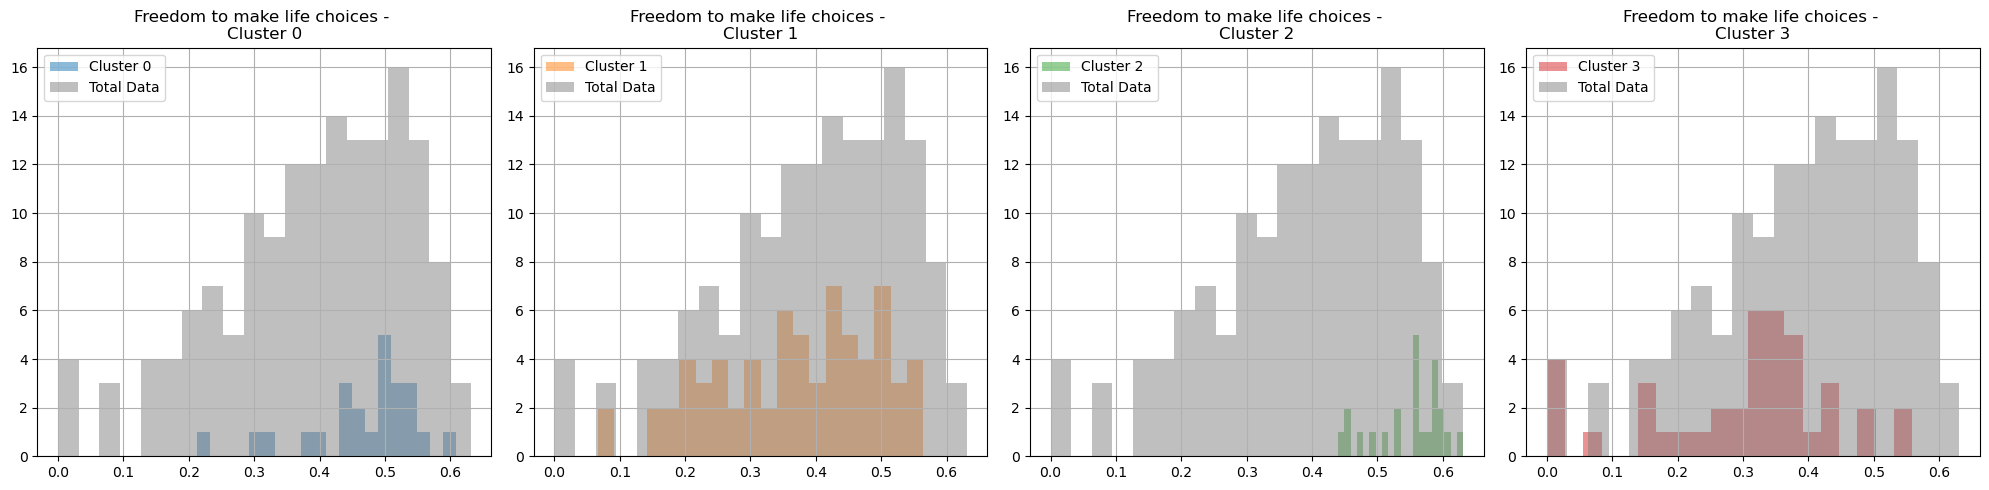

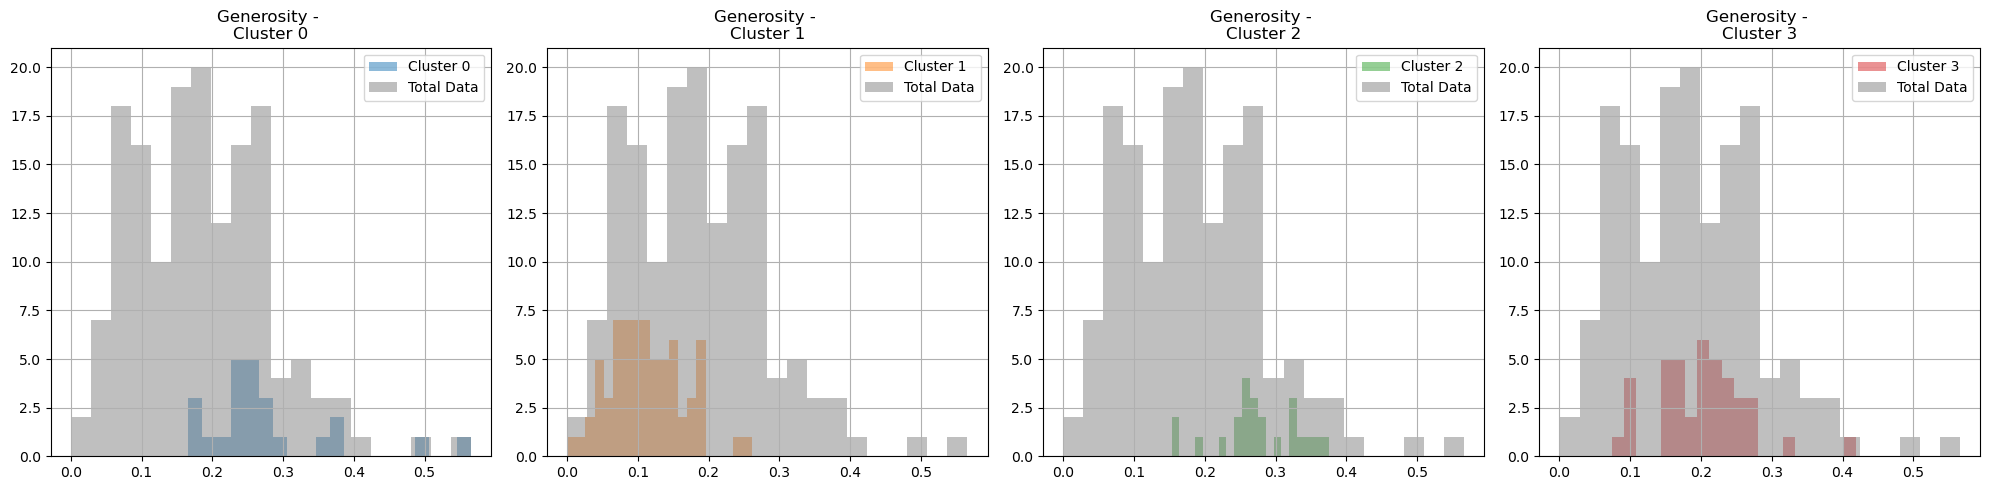

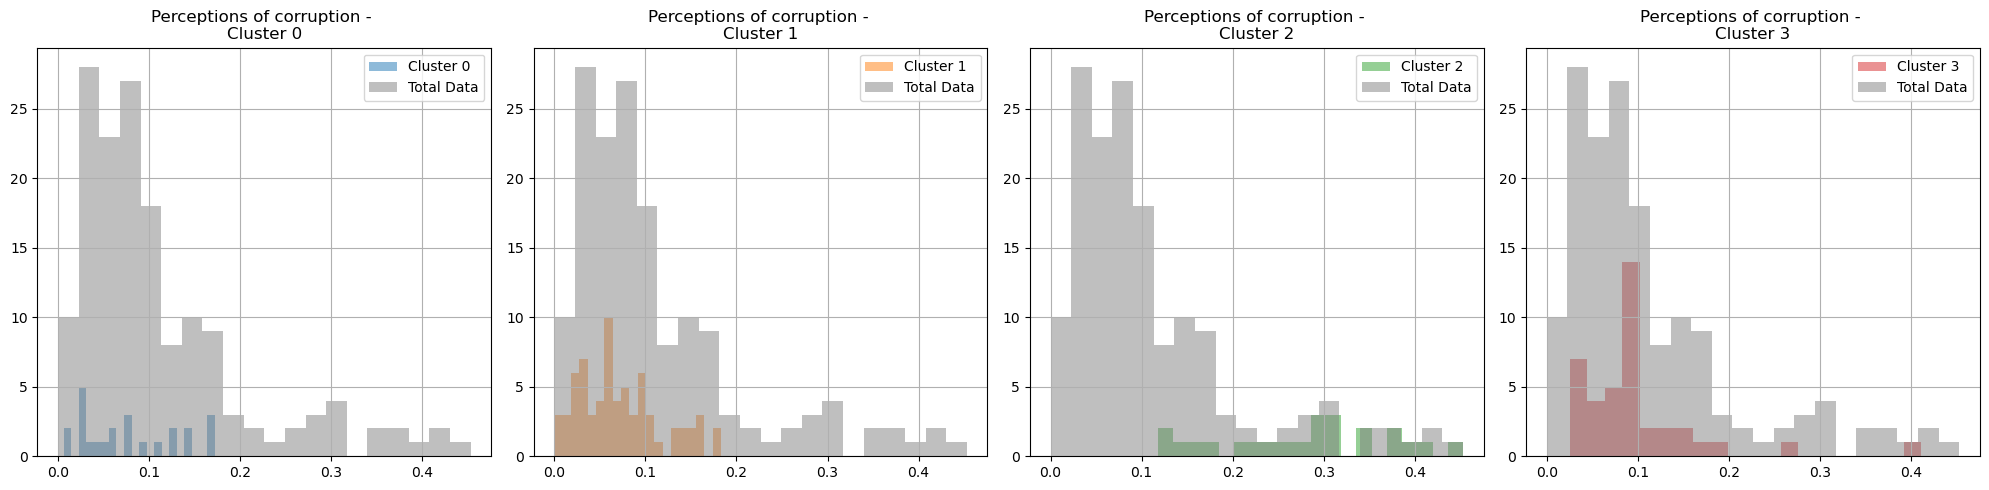

In [255]:
import matplotlib.pyplot as plt

# Loop through each column of the DataFrame (excluding target columns)
for i in df_no_target.columns:
    plt.figure(figsize=(20, 5))
    
    # Loop over the clusters (assuming you have 3 clusters: 0, 1, 2)
    for j in range(4):
        plt.subplot(1, 4, j+1)
        
        # Filter the data for the current cluster
        cluster = happy_df[happy_df['Cluster'] == j]
        
        # Plot the histogram for the column 'i' in the current cluster
        cluster[i].hist(bins=20, alpha=0.5, label=f'Cluster {j}', color=f'C{j}')
        
        # Plot the histogram for the entire dataset with a specific color (e.g., 'gray')
        df_no_target[i].hist(bins=20, alpha=0.5, label='Total Data', color='gray')
        
        # Set the title and legend
        plt.title('{} - \nCluster {}'.format(i, j))
        plt.legend()
    
    plt.tight_layout()
    plt.show()


In [257]:
cluster_names = {
    0: "Balanced Nations",
    1: "Rich but Restricted",
    2: "Highly Developed",
    3: "Struggling Countries"
}

# Map the cluster names to the 'Cluster' column and create a new DataFrame
happy_df_naming = happy_df.copy()  # Copy the 'Cluster' column

# Map the cluster IDs to names
happy_df_naming['Cluster_Name'] = happy_df_naming['Cluster'].map(cluster_names)

# View the new DataFrame with only the cluster and its name
happy_df_naming


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Cluster,Cluster_Name
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2,Highly Developed
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2,Highly Developed
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2,Highly Developed
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2,Highly Developed
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2,Highly Developed
...,...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,3,Struggling Countries
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,3,Struggling Countries
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,3,Struggling Countries
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,3,Struggling Countries
